In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the xlsx file
sheet1 = pd.read_excel(r"C:\Users\ANGELIKA D DUGURAN\OneDrive\Desktop\FinalCapstone\dugurangelika_data_finals.xlsx", engine="openpyxl")

# Display the first few rows
print(sheet1.head())


  Municipality   Zone  Churchgoers  Tricycle Rides  Driver Income
0        Roxas  Rural          697             395         311.84
1       Taytay  Rural          471             432         324.00
2  San Vicente  Rural          556             418         241.15
3       Culion  Rural          745             453         357.63
4        Narra  Rural          743             440         347.37


In [43]:
import pandas as pd

# name of columns
sheet1.columns = ['municipality', 'zone', 'churchgoers', 'tricycle_rides', 'driver_income']

# Drop rows with any missing values (NaN)
data_clean = sheet1.dropna()

# Check for duplicate rows in original data
num_duplicates = sheet1.duplicated().sum()
print(f"Original Data Shape: {sheet1.shape}")
print(f"Duplicate Rows: {num_duplicates}")

# Information about cleaned data after dropping nulls
print("\nAfter removing nulls:")
print(data_clean.info())

# Check if the cleaned dataset meets minimum data size requirement
min_required_rows = 100
num_rows = len(data_clean)

if num_rows >= min_required_rows:
    print(f"\n✅ Dataset is clean and contains {num_rows} rows (≥ {min_required_rows} required).")
else:
    print(f"\n❌ Dataset only contains {num_rows} rows after cleaning. You need at least {min_required_rows}.")

# Outlier removal using IQR method 
def iqr_filter(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
filtered_data = data_clean.copy()
for column in ['driver_income', 'churchgoers', 'tricycle_rides']:
    filtered_data = iqr_filter(filtered_data, column)
print(f"Rows before filtering: {len(data_clean)}")
print(f"Rows after filtering all columns: {len(filtered_data)}")

Original Data Shape: (135, 5)
Duplicate Rows: 0

After removing nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   municipality    135 non-null    object 
 1   zone            135 non-null    object 
 2   churchgoers     135 non-null    int64  
 3   tricycle_rides  135 non-null    int64  
 4   driver_income   135 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.4+ KB
None

✅ Dataset is clean and contains 135 rows (≥ 100 required).
Rows before filtering: 135
Rows after filtering all columns: 135


In [40]:
import numpy as np

print("=== 5 NumPy Operations ===")
mean_church = np.mean(data_clean['churchgoers'])
max_income = np.max(data_clean['driver_income'])
min_income = np.min(data_clean['driver_income'])
median_income = np.median(data_clean['driver_income'])
std_tricycles = np.std(data_clean['tricycle_rides'])

print(f"Mean Churchgoers: {mean_church}")
print(f"Maximum Estimated Driver Income: {max_income}")
print(f"Minimum Estimated Driver Income: {min_income}")
print(f"Median Estimated Driver Income: {median_income}")
print(f"Standard Deviation of Tricycle Rides: {std_tricycles}")

=== 5 NumPy Operations ===
Mean Churchgoers: 729.1407407407407
Maximum Estimated Driver Income: 384.17
Minimum Estimated Driver Income: 138.79
Median Estimated Driver Income: 231.75
Standard Deviation of Tricycle Rides: 254.6359973345205


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Correlation Matrix (Pandas)
print("=== Correlation Matrix ===")
correlation_matrix = data_clean[['churchgoers', 'tricycle_rides', 'driver_income']].corr()
print(correlation_matrix)

print("=== Individual Pearson Correlations ===")

# Churchgoers vs Tricycle Rides
r1, p1 = stats.pearsonr(data_clean['churchgoers'], data_clean['tricycle_rides'])
print(f"Churchgoers vs Tricycle Rides: r = {r1:.2f}, p = {p1:.4f}")

# Churchgoers vs Driver Income
r2, p2 = stats.pearsonr(data_clean['churchgoers'], data_clean['driver_income'])
print(f"Churchgoers vs Driver Income: r = {r2:.2f}, p = {p2:.4f}")

# Tricycle Rides vs Driver Income
r3, p3 = stats.pearsonr(data_clean['tricycle_rides'], data_clean['driver_income'])
print(f"Tricycle Rides vs Driver Income: r = {r3:.2f}, p = {p3:.4f}")


=== Correlation Matrix ===
                churchgoers  tricycle_rides  driver_income
churchgoers        1.000000        0.875682      -0.567372
tricycle_rides     0.875682        1.000000      -0.535267
driver_income     -0.567372       -0.535267       1.000000
=== Individual Pearson Correlations ===
Churchgoers vs Tricycle Rides: r = 0.88, p = 0.0000
Churchgoers vs Driver Income: r = -0.57, p = 0.0000
Tricycle Rides vs Driver Income: r = -0.54, p = 0.0000


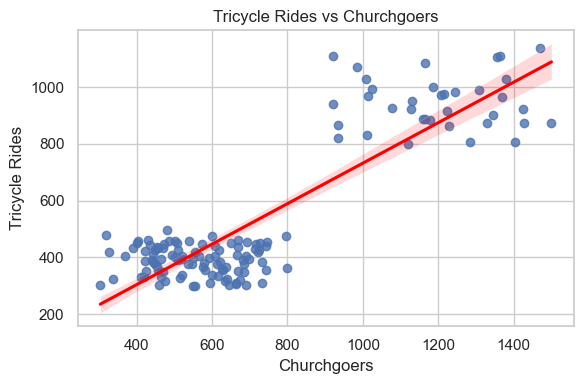

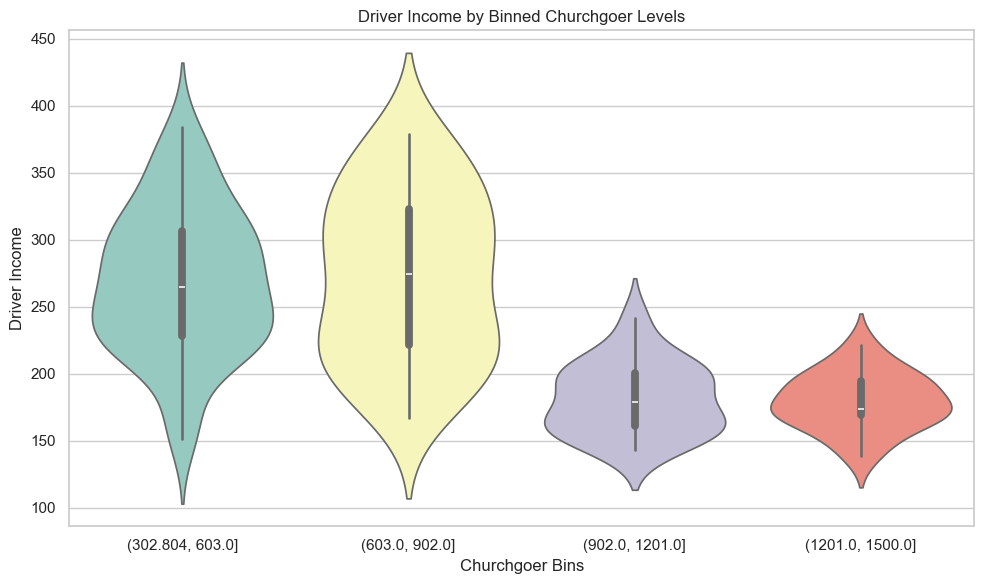

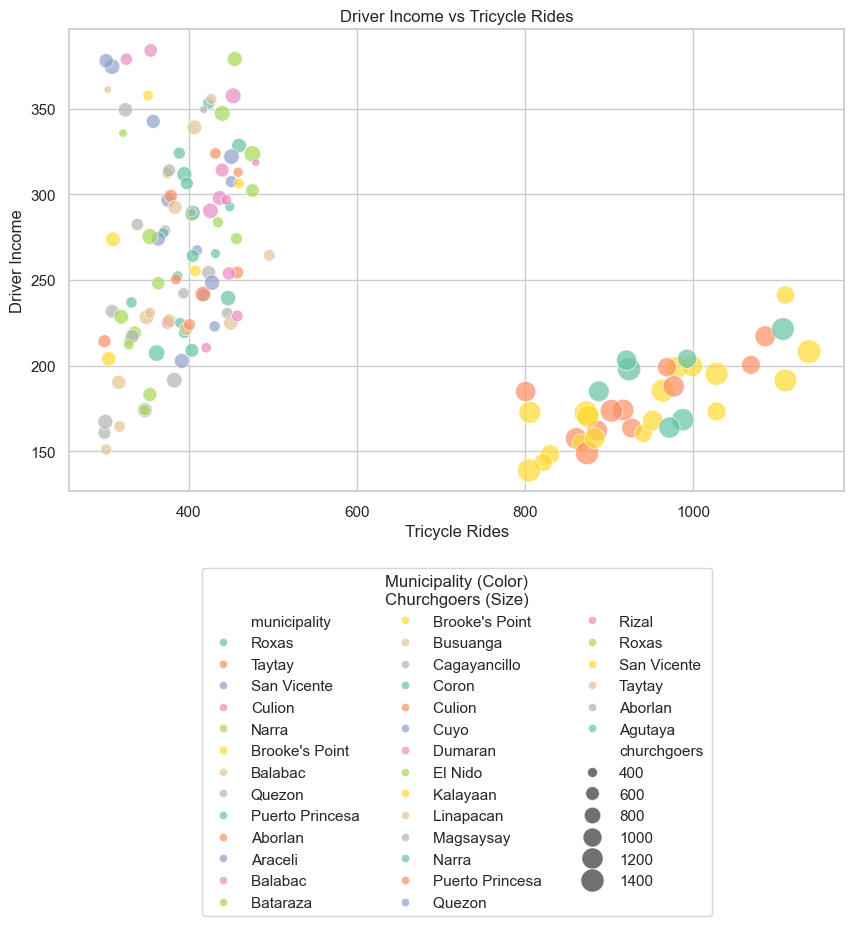

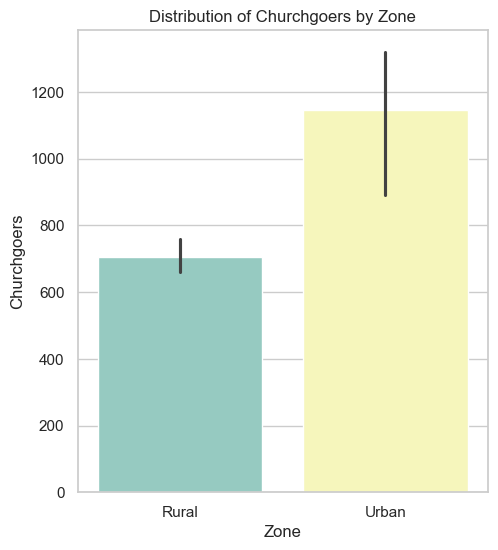

In [33]:
# 1. Tricycle Rides vs Churchgoers — Scatter Plot with Regression Line
plt.figure(figsize=(6, 4))
sns.regplot(x='churchgoers', y='tricycle_rides', data=data_clean, line_kws={'color': 'red'})
plt.title("Tricycle Rides vs Churchgoers")
plt.xlabel("Churchgoers")
plt.ylabel("Tricycle Rides")
plt.tight_layout()
plt.show()

# 2. Churhgoers vs. Driver's income - violin plot

# Create bins of churchgoers
data_clean['church_bin'] = pd.cut(data_clean['churchgoers'], bins=4)

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=data_clean,
    x='church_bin',
    y='driver_income',
    hue='church_bin',           
    palette='Set3',
    legend=False                
)

plt.title('Driver Income by Binned Churchgoer Levels')
plt.xlabel('Churchgoer Bins')
plt.ylabel('Driver Income')
plt.tight_layout()
plt.show()


# 3. Tricycle Rides vs Driver Income — Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tricycle_rides',
    y='driver_income',
    size='churchgoers',
    hue='municipality',
    sizes=(30, 300),
    alpha=0.7,
    data=data_clean,
    palette='Set2'
)

plt.title("Driver Income vs Tricycle Rides")
plt.xlabel("Tricycle Rides")
plt.ylabel("Driver Income")

# Legend with clear explanation of what color and size represent
plt.legend(
    title='Municipality (Color)\nChurchgoers (Size)',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)

plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
sns.barplot(data=data_clean, x='zone', y='churchgoers', hue='zone', palette='Set3', legend=False)
plt.title('Distribution of Churchgoers by Zone')
plt.ylabel('Churchgoers')
plt.xlabel('Zone');





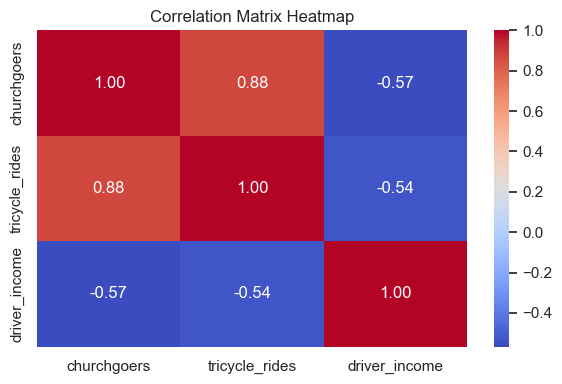

In [34]:
# Heatmap for visualizing correlation strength
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()



In [35]:
import pandas as pd
from scipy import stats

# Load the Excel file
sheet1 = pd.read_excel(r"C:\Users\ANGELIKA D DUGURAN\OneDrive\Desktop\FinalCapstone\dugurangelika_data_finals.xlsx", engine="openpyxl") 

# Clean column names 
sheet1.columns = sheet1.columns.str.strip()

# Function to perform t-test between Urban and Rural for a given variable
def ttest_by_zone(sheet1, variable):
    urban = sheet1[sheet1['Zone'].str.lower() == 'urban'][variable]
    rural = sheet1[sheet1['Zone'].str.lower() == 'rural'][variable]

    # Welch's t-test (does not assume equal variances)
    t_stat, p_val = stats.ttest_ind(urban, rural, equal_var=False)
    
    print(f"\nT-test for {variable} between Urban and Rural zones:")
    print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("→ Statistically significant difference.")
    else:
        print("→ No statistically significant difference.")

# Run t-tests
ttest_by_zone(sheet1, 'Churchgoers')
ttest_by_zone(sheet1, 'Tricycle Rides')
ttest_by_zone(sheet1, 'Driver Income')





T-test for Churchgoers between Urban and Rural zones:
t-statistic: 3.477, p-value: 0.0115
→ Statistically significant difference.

T-test for Tricycle Rides between Urban and Rural zones:
t-statistic: 4.049, p-value: 0.0053
→ Statistically significant difference.

T-test for Driver Income between Urban and Rural zones:
t-statistic: -3.911, p-value: 0.0033
→ Statistically significant difference.


In [36]:
#Statsmodels
import statsmodels.api as sm

# Predictor variable
X = sm.add_constant(data_clean['churchgoers'])  # adds intercept term

# Response variable
y = data_clean['driver_income']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

print("\nLinear Regression Summary:")
print(model.summary())


Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:          driver_income   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     63.14
Date:                Sat, 24 May 2025   Prob (F-statistic):           7.23e-13
Time:                        19:20:43   Log-Likelihood:                -727.17
No. Observations:                 135   AIC:                             1458.
Df Residuals:                     133   BIC:                             1464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         331.2340